In [1]:
from math import sqrt #제곱근(루트) 구하는 함수
from numpy import mean
from scipy.stats import sem #추정값인 표본평균들과 참값인 모평균(표본평균의 평균)과의 표준차이 
from scipy.stats import t #확률밀도함수

#### 독립표본 t검정
표본으로부터 측정된 분산, 표준편차를 이용하여 두 모집단의 평균의 차이를 검정하는 방법

In [2]:
def independent_ttest(data1, data2, alpha):
    
    #평균값
    mean1, mean2 = mean(data1), mean(data2)
    
    #모집단이 큰 경우 표본을 여러번 추출하게 되는데, 
    #추출할 때마다 표본들의 평균값이 달라지게 된다.
    #표본평균의 표준편차를 표준오차라고 한다. sem함수로 계산
    se1, se2 = sem(data1), sem(data2)
    
    #표본간의 차이에 대한 표준오차 계산. sqrt>루트
    sed =sqrt(se1**2 + se2**2) 
    
    #t 통계량(t statistic) 계산. 두 표본평균 차이/표준오차 > 오차의 퍼센티지 
    t_stat = (mean1 - mean2) / sed
    
    #자유도(degree of freedom)계산 (샘플개수 - 1)
    #표본수가 n개인 표본이 있다면 표본값 중 자유롭게 변할 수 있는 값은  n-1개의 표본 > 1개는 표본값을 가져야 한다
    #ex. 시험 3회 응시, 평균 80점일 때, 70점 90점이라면 나머지 1번은 80점이 되어야 한다. > 표본수 3, 자유롭게 변할 수 있는 값 2
    df = len(data1) + len(data2) - 2
    
    #p-value계산. cdf>누적분포함수
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    
    return t_stat, p
    
#t값이란 이론적 평균(모집단 평균)과 실제평균(표본 평균)의 차이가 허용 가능한 오차 수준 (표준오차)에 비해 몇 배 더 큰지를 나타내는 값을 말한다. 따라서, t값이 크면 클수록 그룹간 차이가 더 크다는 것을 의미한다.

In [3]:
#독립변수(입력값) - 월별 전기 생산금액(억원)
x = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]
#종속변수(출력값) - 월별 전기 사용량(백만Kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

In [4]:
#95% 신뢰수준
alpha = 0.05
t_stat, p = independent_ttest(x, y, alpha)
print('t=%.3f, p-value=%f' % (t_stat,p))

if p > alpha :
    print('p-value > 0.05, 귀무가설 채택, 대립가설 기각')
else :
    print('p-value < 0.05, 귀무가설 기각, 대립가설 채택' )

t=4.752, p-value=0.000096
p-value < 0.05, 귀무가설 기각, 대립가설 채택


xx==========================
[-8.         -7.83838384 -7.67676768 -7.51515152 -7.35353535 -7.19191919
 -7.03030303 -6.86868687 -6.70707071 -6.54545455 -6.38383838 -6.22222222
 -6.06060606 -5.8989899  -5.73737374 -5.57575758 -5.41414141 -5.25252525
 -5.09090909 -4.92929293 -4.76767677 -4.60606061 -4.44444444 -4.28282828
 -4.12121212 -3.95959596 -3.7979798  -3.63636364 -3.47474747 -3.31313131
 -3.15151515 -2.98989899 -2.82828283 -2.66666667 -2.50505051 -2.34343434
 -2.18181818 -2.02020202 -1.85858586 -1.6969697  -1.53535354 -1.37373737
 -1.21212121 -1.05050505 -0.88888889 -0.72727273 -0.56565657 -0.4040404
 -0.24242424 -0.08080808  0.08080808  0.24242424  0.4040404   0.56565657
  0.72727273  0.88888889  1.05050505  1.21212121  1.37373737  1.53535354
  1.6969697   1.85858586  2.02020202  2.18181818  2.34343434  2.50505051
  2.66666667  2.82828283  2.98989899  3.15151515  3.31313131  3.47474747
  3.63636364  3.7979798   3.95959596  4.12121212  4.28282828  4.44444444
  4.60606061  4.7676767

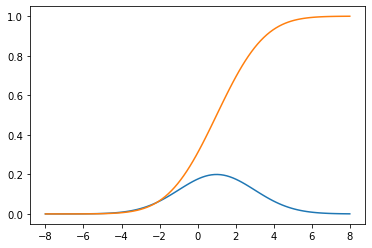

In [2]:
##참고##

#확률분포 : 어떤 사건에 어느 정도의 확률이 할당되었는지를 묘사한 것
#         무한한 표본 개수가 있다면, 표본당 확률을 하나하나 확인할 수 없으므로 이때 함수를 이용 

#누적분포함수(cdf : cumulative distribution function)
#모든 사건에 대해 확률을 나눌 구간을 정의하기가 어려우므로 시작점을 마이너스 무한대로 설정하고 
#마이너스무한대 ~ -1, 마이너스무한대 ~ 0, 마이너스무한대 ~ 1 식으로 구간을 정의하는 방법 > 마이너스무한대를 시작점으로 1개의 기준치로 구간을 나눈다.
# .... 모르겠다.. 
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import scipy as sp

xx = np.linspace(-8, 8, 100)
#x = np.linspace(start, stop, num) 1차원 배열 생성 함수
#start 시작값, stop 끝값, num 간격 개수(설정 안하면 50 default)
print('xx==========================')
print(xx)

from scipy.stats import norm
#정규분포 생성, loc 분포의 기대값(분포의 중심을 나타내는 값), scale 분포의 표준편차
#rv = sp.stats.norm(loc=1, scale=2)
rv = norm(loc=1, scale=2)

#누적분포함수
cdf = rv.cdf(xx)

#확률밀도함수(누적분포함수를 미분한 함수)
pdf = rv.pdf(xx)

print('xx:5=========================')
print(xx[:5])
print('cdf:5=========================')
print(cdf[:5])

plt.plot(xx, pdf) #그래프의 파란선, 미분>기울기값을 그래프화
plt.plot(xx, cdf) #그래프의 주황선
plt.show()
